In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import pandas as pd

/Users/vector/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
final_diff_csv = 'FL_0.5_0.5_diff_1.csv'


In [23]:
final_diff_df = pd.read_csv(final_diff_csv)
# final_diff_df['rank_cat'] stores str(rank) + '_' + cat
final_diff_df['rank_cat'] = final_diff_df['rank'].astype(str) + '. ' + final_diff_df['cat']
final_diff_df

,rank,cat,FL_score,PA_score,difference,FL_sunbathe,PA_sunbathe,rank_cat
0,1,Beaches,-7.865534,-13.815511,5.949976,-7.865534,-13.815511,1. Beaches
1,2,Modern European,-8.155856,-13.815511,5.659655,-8.155856,-13.815511,2. Modern European
2,3,Dog Parks,-8.176100,-13.815511,5.639411,-8.176100,-13.815511,3. Dog Parks
3,4,Festivals,-8.331350,-13.815511,5.484161,-8.331350,-13.815511,4. Festivals
4,5,Caribbean,-10.208082,-13.815511,3.607429,-10.208082,-13.815511,5. Caribbean


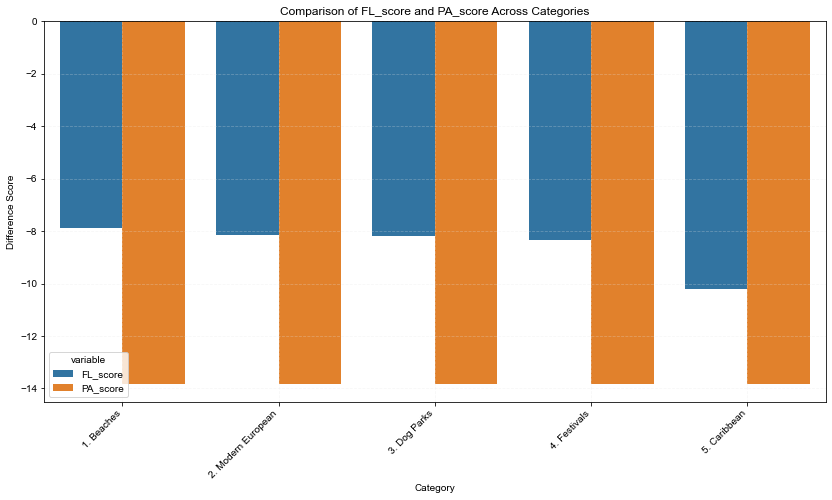

In [24]:
# Set the default font to Arial
plt.rc('font', family='Arial')

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Plot the 'FL_score' values
sns.barplot(x='rank_cat', y='value', hue='variable', data=pd.melt(final_diff_df, id_vars=['rank_cat'], value_vars=['FL_score', 'PA_score']))

# Set the labels and title for the Y-axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Difference Score')
plt.title('Comparison of FL_score and PA_score Across Categories')

# Add a very light dashed grid
plt.grid(True, which='both', color='0.9', linestyle='--', alpha=0.3)

# Show the plot
plt.show()

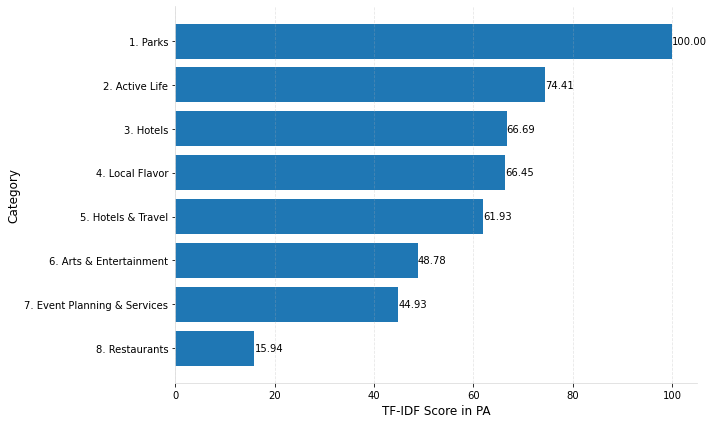

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_excel('PA.xlsx')  # Replace with your actual file path
# Create a new column 'ranked_category' that combines the 'rank' and 'category' columns
df['ranked_category'] = df['rank'].astype(str) + '. ' + df['category']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['ranked_category'], df['tf-idf score in PA'])

# Invert the y-axis to have the highest score at the top
plt.gca().invert_yaxis()

# Add labels (the tf-idf scores) to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

# Set the labels and title
plt.ylabel('Category', fontsize=12)
plt.xlabel('TF-IDF Score in PA', fontsize=12)
# plt.title('TF-IDF Scores by Category', fontsize=14)

# Remove all the spines except the bottom and left
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set the left and bottom spine color to a light grey for minimal visibility, matching a simplified style
plt.gca().spines['left'].set_color('#DDDDDD')
plt.gca().spines['bottom'].set_color('#DDDDDD')

# Add a very light dashed grid
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.3)

# Show the plot with a tight layout to ensure no labels are cut off
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('PA.png', dpi=300)

plt.show()


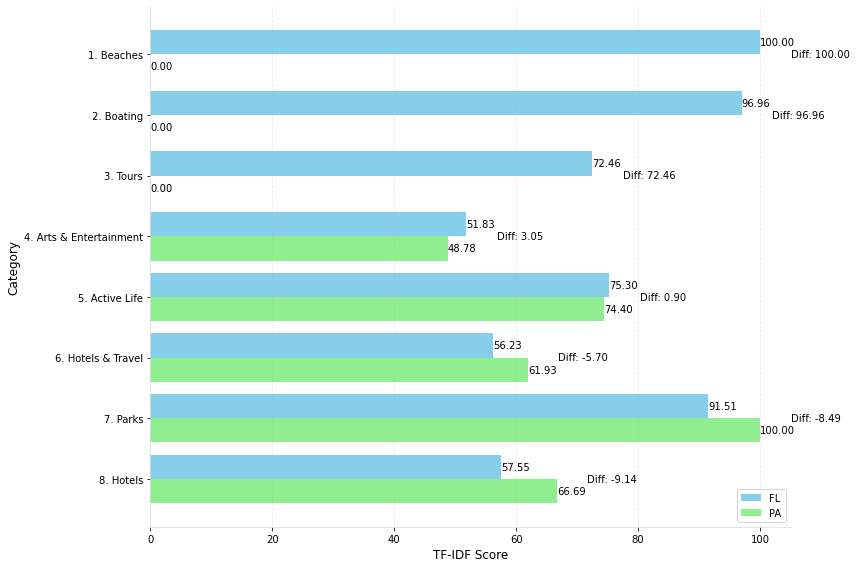

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df_diff = pd.read_excel('FL_diff.xlsx')  # Replace with your actual file path
# Create a new column 'ranked_category' that combines the 'rank' and 'category' columns
df_diff['ranked_category'] = df_diff['rank'].astype(str) + '. ' + df_diff['category']

plt.figure(figsize=(12, 8))
indices = range(len(df_diff['ranked_category']))
bar_width = 0.4  # Width of the bars

# Create bars for 'tf-idf score in FL'
bars_fl = plt.barh([i - bar_width/2 for i in indices], df_diff['tf-idf score in FL'], 
                   height=bar_width, color='skyblue', label='FL')

# Create bars for 'tf-idf score in PA'
bars_pa = plt.barh([i + bar_width/2 for i in indices], df_diff['tf-idf score in PA'], 
                   height=bar_width, color='lightgreen', label='PA')

# Invert the y-axis to have the highest score at the top
plt.gca().invert_yaxis()

# Annotate with the differences for each category
for i, (bar_fl, bar_pa) in enumerate(zip(bars_fl, bars_pa)):
    plt.text(bar_fl.get_width(), bar_fl.get_y() + bar_fl.get_height()/2,
             f'{bar_fl.get_width():.2f}', va='center', ha='left')
    plt.text(bar_pa.get_width(), bar_pa.get_y() + bar_pa.get_height()/2,
             f'{bar_pa.get_width():.2f}', va='center', ha='left')
    # Calculate the difference and annotate it on the plot
    difference = df_diff['tf-idf score in FL'][i] - df_diff['tf-idf score in PA'][i]
    plt.text(max(bar_fl.get_width(), bar_pa.get_width()) + 5,  # X position, added a small offset for clarity
             (bar_fl.get_y() + bar_pa.get_y())/2 + bar_width/2,  # Y position at the middle of the grouped bars
             f'Diff: {difference:.2f}',  # Text to annotate
             va='center', ha='left')

# Set the labels and title
plt.xlabel('TF-IDF Score', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.yticks(indices, df_diff['ranked_category'])  # Set the custom y-ticks to show the category labels
# plt.title('TF-IDF Scores by Category in FL and PA', fontsize=14)

# Create legend & Show graphic
plt.legend()

# Remove all the spines except the bottom and left
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set the left and bottom spine color to a light grey for minimal visibility, matching a simplified style
plt.gca().spines['left'].set_color('#DDDDDD')
plt.gca().spines['bottom'].set_color('#DDDDDD')

# Add a very light dashed grid
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.3)

# Show the plot with a tight layout to ensure no labels are cut off
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('FL_diff.png', dpi=300)
plt.show()
